In [1]:
%matplotlib inline
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib as mpl
from corgy import Corgy
from matplotlib.ticker import FixedLocator, FixedFormatter
from tqdm import tqdm

from alphanet._dataset import SplitLTDataset
from alphanet._plotwrap import PlottingConfig, PlotFont
from alphanet._samplers import AllFewSampler, ClassBalancedBaseSampler
from alphanet._utils import get_topk_acc
from alphanet.plot import _load_train_res, _load_baseline_res

[nltk_data] Downloading package wordnet to .nltk...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
PROFILES = {
    "paper": PlottingConfig(
        theme="light",
        context="paper",
        font=PlotFont(
            default="serif",
            math="cm",
        ),
        bg="#ffffff",
        fg_primary="#000000",
        fg_secondary="#bbbbbb",
    ),
    "web_light": PlottingConfig(
        theme="light",
        context="notebook",
        font=PlotFont(
            default="sans-serif",
            math="stixsans",
            sans_serif=["system-ui" " -apple-system" "Segoe UI" "Roboto" "Helvetica Neue" "Noto Sans" "Liberation Sans" "Arial" "sans-serif"],
        ),
    ),
    "web_dark": PlottingConfig(
        theme="dark",
        context="notebook",
        font=PlotFont(
            default="sans-serif",
            math="stixsans",
            sans_serif=["system-ui" " -apple-system" "Segoe UI" "Roboto" "Helvetica Neue" "Noto Sans" "Liberation Sans" "Arial" "sans-serif"],
        ),
    ),
}
WIDTH_PER_CONTEXT = {"paper": 6, "notebook": 6*1.25}

In [ ]:
class Args(Corgy):
    n_boot: int = 10000
    rep: str = "*"
    acc_k: int = 1
    eval_batch_size: int = 1024

In [ ]:
# args = Args.parse_from_cmdline()
args = Args(n_boot=1000, rep="1", acc_k=1, eval_batch_size=256)

In [4]:
df_rows = []
datasets = list(map(SplitLTDataset, [
    "placeslt_resnet152_crt",
    "placeslt_resnet152_lws",
    "cifar100_resnet32_ride",
    "cifar100_resnet32_ltr",
    "imagenetlt_resnext50_crt",
    "imagenetlt_resnext50_lws",
    "imagenetlt_resnext50_ride",
]))
rho_strs = ["0.1", "0.2", "0.3", "0.4", "0.5", "0.75", "1", "1.25", "1.5", "1.75", "2"]
data_root = Path("results/main")


def _get_accs(_res):
    if args.acc_k == 1:
        _accs = {_split.title(): _acc for _split, _acc in _res.test_acc__per__split.items()}
        _accs["Overall"] = _res.test_metrics["accuracy"]
    else:
        _accs = get_topk_acc(_res, args.acc_k, args.eval_batch_size)
    return _accs


for dataset in datasets:
    baseline_res = _load_baseline_res(dataset, batch_size=1024)
    baseline_accs = _get_accs(baseline_res)

    for rho_str in rho_strs:
        for res_file in tqdm(
            list((data_root / dataset / f"rho_{rho_str}").glob(f"rep_{args.rep}/result.pth")),
            desc=f"Loading results for {dataset}|rho={rho_str}",
            unit="file",
            leave=False,
        ):
            res = _load_train_res(res_file, batch_size=args.eval_batch_size)
            assert list(res.training_config.sampler_builder.sampler_classes) == [
                AllFewSampler,
                ClassBalancedBaseSampler,
            ]

            rho = float(res.training_config.sampler_builder.sampler_args[1]["r"])
            assert float(rho_str) == rho
            assert res.train_data_info.dataset_name == dataset

            accs = _get_accs(res)

            for split in ["Many", "Medium", "Few", "Overall"]:
                df_rows.append(
                    {
                        "Dataset": dataset.proper_name,
                        "$\\rho$": rho,
                        "Split": split,
                        "Accuracy change": accs[split] - baseline_accs[split],
                    }
                )
df = pd.DataFrame(df_rows)
df

INFO:22:06:35:stacking 'test' features...
INFO:22:06:35:stacking 'test' features...done
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:18<00:00, 2013.89sample/s]
Loading results for placeslt_resnet152_crt|rho=0.1:   0%|          | 0/1 [00:00<?, ?file/s]INFO:22:06:54:stacking 'test' features...
INFO:22:06:54:stacking 'test' features...done
/home/shiny/projects/alphanet/.venv/lib/python3.11/site-packages/ignite/contrib/handlers/tqdm_logger.py:127: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
INFO:22:06:54:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:06:59:Epoch[1] Complete. Time taken: 00:00:04.975
INFO:22:06:59:Engine run complete. Time taken: 00:00:05.125
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:21<00:00, 1687.09sample/s]
Loading results for placeslt_resnet152_crt|rho=0.2:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:07:21:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:07:23:Epoch[1] Complete. Time taken: 00:00:02.090
INFO:22:07:23:Engine run complete. Time taken: 00:00:02.099
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1788.63sample/s]
Loading results for placeslt_resnet152_crt|rho=0.3:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:07:44:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:07:46:Epoch[1] Complete. Time taken: 00:00:01.961
INFO:22:07:46:Engine run complete. Time taken: 00:00:01.970
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1896.44sample/s]
Loading results for placeslt_resnet152_crt|rho=0.4:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:08:05:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:08:07:Epoch[1] Complete. Time taken: 00:00:01.948
INFO:22:08:07:Engine run complete. Time taken: 00:00:01.959
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1741.35sample/s]
Loading results for placeslt_resnet152_crt|rho=0.5:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:08:28:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:08:30:Epoch[1] Complete. Time taken: 00:00:01.946
INFO:22:08:30:Engine run complete. Time taken: 00:00:01.956
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1814.80sample/s]
Loading results for placeslt_resnet152_crt|rho=0.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:08:50:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:08:52:Epoch[1] Complete. Time taken: 00:00:01.927
INFO:22:08:52:Engine run complete. Time taken: 00:00:01.936
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1908.96sample/s]
Loading results for placeslt_resnet152_crt|rho=1:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:09:12:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:09:14:Epoch[1] Complete. Time taken: 00:00:01.920
INFO:22:09:14:Engine run complete. Time taken: 00:00:01.929
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1830.06sample/s]
Loading results for placeslt_resnet152_crt|rho=1.25:   0%|          | 0/1 [00:00<?, ?file/s]     INFO:22:09:34:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:09:36:Epoch[1] Complete. Time taken: 00:00:02.000
INFO:22:09:36:Engine run complete. Time taken: 00:00:02.009
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1864.83sample/s]
Loading results for placeslt_resnet152_crt|rho=1.5:   0%|          | 0/1 [00:00<?, ?file/s]         INFO:22:09:55:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:09:57:Epoch[1] Complete. Time taken: 00:00:01.933
INFO:22:09:57:Engine run complete. Time taken: 00:00:01.943
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1873.72sample/s]
Loading results for placeslt_resnet152_crt|rho=1.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:10:17:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:10:19:Epoch[1] Complete. Time taken: 00:00:02.010
INFO:22:10:19:Engine run complete. Time taken: 00:00:02.020
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1869.06sample/s]
Loading results for placeslt_resnet152_crt|rho=2:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:10:39:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:10:41:Epoch[1] Complete. Time taken: 00:00:01.943
INFO:22:10:41:Engine run complete. Time taken: 00:00:01.953
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1834.49sample/s]
INFO:22:11:02:stacking 'test' features...                                                        
INFO:22:11:02:stacking 'test' features...done
INFO:22:11:03:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:11:03:Epoch[1] Complete. Time taken: 00:00:00.695
INFO:22:11:03:Engine run complete. Time taken: 00:00:00.705
INFO:22:11:04:stacking 'test' features...
INFO:22:11:04:stacking 'test' features...done
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:14<00:00, 2502.94sample/s]
Loading results for placeslt_resnet152_lws|rho=0.1:   0%|          | 0/1 [00:00<?, ?file/s]INFO:22:11:19:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:11:21:Epoch[1] Complete. Time taken: 00:00:02.008
INFO:22:11:21:Engine run complete. Time taken: 00:00:02.018
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1863.30sample/s]
Loading results for placeslt_resnet152_lws|rho=0.2:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:11:41:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:11:43:Epoch[1] Complete. Time taken: 00:00:01.941
INFO:22:11:43:Engine run complete. Time taken: 00:00:01.951
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1816.96sample/s]
Loading results for placeslt_resnet152_lws|rho=0.3:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:12:03:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:12:05:Epoch[1] Complete. Time taken: 00:00:01.981
INFO:22:12:05:Engine run complete. Time taken: 00:00:01.991
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1744.53sample/s]
Loading results for placeslt_resnet152_lws|rho=0.4:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:12:26:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:12:28:Epoch[1] Complete. Time taken: 00:00:02.052
INFO:22:12:28:Engine run complete. Time taken: 00:00:02.061
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:21<00:00, 1709.17sample/s]
Loading results for placeslt_resnet152_lws|rho=0.5:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:12:50:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:12:52:Epoch[1] Complete. Time taken: 00:00:02.006
INFO:22:12:52:Engine run complete. Time taken: 00:00:02.016
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:21<00:00, 1708.18sample/s]
Loading results for placeslt_resnet152_lws|rho=0.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:13:13:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:13:15:Epoch[1] Complete. Time taken: 00:00:02.104
INFO:22:13:15:Engine run complete. Time taken: 00:00:02.114
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1758.76sample/s]
Loading results for placeslt_resnet152_lws|rho=1:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:13:36:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:13:38:Epoch[1] Complete. Time taken: 00:00:01.991
INFO:22:13:38:Engine run complete. Time taken: 00:00:02.000
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1839.83sample/s]
Loading results for placeslt_resnet152_lws|rho=1.25:   0%|          | 0/1 [00:00<?, ?file/s]     INFO:22:13:58:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:14:00:Epoch[1] Complete. Time taken: 00:00:02.016
INFO:22:14:00:Engine run complete. Time taken: 00:00:02.026
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1832.75sample/s]
Loading results for placeslt_resnet152_lws|rho=1.5:   0%|          | 0/1 [00:00<?, ?file/s]         INFO:22:14:21:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:14:23:Epoch[1] Complete. Time taken: 00:00:01.956
INFO:22:14:23:Engine run complete. Time taken: 00:00:01.966
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:18<00:00, 1926.78sample/s]
Loading results for placeslt_resnet152_lws|rho=1.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:14:42:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:14:44:Epoch[1] Complete. Time taken: 00:00:01.976
INFO:22:14:44:Engine run complete. Time taken: 00:00:01.988
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:19<00:00, 1880.53sample/s]
Loading results for placeslt_resnet152_lws|rho=2:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:15:03:Engine run starting with max_epochs=1.


Generating test results for file[1/36]   3%|2          [00:00<?]

INFO:22:15:05:Epoch[1] Complete. Time taken: 00:00:01.969
INFO:22:15:05:Engine run complete. Time taken: 00:00:01.979
Computing top-5 accuracy: 100%|██████████| 36500/36500 [00:20<00:00, 1821.53sample/s]
INFO:22:15:26:stacking 'test' features...                                                        
INFO:22:15:26:stacking 'test' features...done
INFO:22:15:26:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:26:Epoch[1] Complete. Time taken: 00:00:00.127
INFO:22:15:26:Engine run complete. Time taken: 00:00:00.132
INFO:22:15:26:stacking 'test' features...
INFO:22:15:26:stacking 'test' features...done
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:03<00:00, 2618.81sample/s]
Loading results for cifar100_resnet32_ride|rho=0.1:   0%|          | 0/1 [00:00<?, ?file/s]INFO:22:15:30:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:30:Epoch[1] Complete. Time taken: 00:00:00.261
INFO:22:15:30:Engine run complete. Time taken: 00:00:00.265
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2249.57sample/s]
Loading results for cifar100_resnet32_ride|rho=0.2:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:15:34:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:35:Epoch[1] Complete. Time taken: 00:00:00.223
INFO:22:15:35:Engine run complete. Time taken: 00:00:00.227
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2294.82sample/s]
Loading results for cifar100_resnet32_ride|rho=0.3:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:15:39:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:39:Epoch[1] Complete. Time taken: 00:00:00.338
INFO:22:15:39:Engine run complete. Time taken: 00:00:00.342
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2236.60sample/s]
Loading results for cifar100_resnet32_ride|rho=0.4:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:15:44:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:44:Epoch[1] Complete. Time taken: 00:00:00.234
INFO:22:15:44:Engine run complete. Time taken: 00:00:00.237
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2315.59sample/s]
Loading results for cifar100_resnet32_ride|rho=0.5:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:15:49:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:49:Epoch[1] Complete. Time taken: 00:00:00.270
INFO:22:15:49:Engine run complete. Time taken: 00:00:00.273
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2302.62sample/s]
Loading results for cifar100_resnet32_ride|rho=0.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:15:53:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:54:Epoch[1] Complete. Time taken: 00:00:00.228
INFO:22:15:54:Engine run complete. Time taken: 00:00:00.233
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2340.49sample/s]
Loading results for cifar100_resnet32_ride|rho=1:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:15:58:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:15:58:Epoch[1] Complete. Time taken: 00:00:00.244
INFO:22:15:58:Engine run complete. Time taken: 00:00:00.249
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2362.43sample/s]
Loading results for cifar100_resnet32_ride|rho=1.25:   0%|          | 0/1 [00:00<?, ?file/s]     INFO:22:16:02:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:03:Epoch[1] Complete. Time taken: 00:00:00.327
INFO:22:16:03:Engine run complete. Time taken: 00:00:00.331
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2327.75sample/s]
Loading results for cifar100_resnet32_ride|rho=1.5:   0%|          | 0/1 [00:00<?, ?file/s]         INFO:22:16:07:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:07:Epoch[1] Complete. Time taken: 00:00:00.254
INFO:22:16:07:Engine run complete. Time taken: 00:00:00.258
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2402.94sample/s]
Loading results for cifar100_resnet32_ride|rho=1.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:16:12:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:12:Epoch[1] Complete. Time taken: 00:00:00.237
INFO:22:16:12:Engine run complete. Time taken: 00:00:00.241
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2360.88sample/s]
Loading results for cifar100_resnet32_ride|rho=2:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:16:16:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:17:Epoch[1] Complete. Time taken: 00:00:00.232
INFO:22:16:17:Engine run complete. Time taken: 00:00:00.235
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2272.13sample/s]
INFO:22:16:21:stacking 'test' features...                                                        
INFO:22:16:21:stacking 'test' features...done
INFO:22:16:21:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:21:Epoch[1] Complete. Time taken: 00:00:00.138
INFO:22:16:21:Engine run complete. Time taken: 00:00:00.142
INFO:22:16:21:stacking 'test' features...
INFO:22:16:21:stacking 'test' features...done
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:03<00:00, 2515.78sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.1:   0%|          | 0/1 [00:00<?, ?file/s]INFO:22:16:25:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:26:Epoch[1] Complete. Time taken: 00:00:00.313
INFO:22:16:26:Engine run complete. Time taken: 00:00:00.317
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2171.50sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.2:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:16:30:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:31:Epoch[1] Complete. Time taken: 00:00:00.268
INFO:22:16:31:Engine run complete. Time taken: 00:00:00.271
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2364.16sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.3:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:16:35:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:35:Epoch[1] Complete. Time taken: 00:00:00.209
INFO:22:16:35:Engine run complete. Time taken: 00:00:00.212
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2239.77sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.4:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:16:40:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:40:Epoch[1] Complete. Time taken: 00:00:00.227
INFO:22:16:40:Engine run complete. Time taken: 00:00:00.232
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2224.44sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.5:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:16:45:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:45:Epoch[1] Complete. Time taken: 00:00:00.224
INFO:22:16:45:Engine run complete. Time taken: 00:00:00.228
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2317.43sample/s]
Loading results for cifar100_resnet32_ltr|rho=0.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:16:49:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:50:Epoch[1] Complete. Time taken: 00:00:00.310
INFO:22:16:50:Engine run complete. Time taken: 00:00:00.314
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2365.14sample/s]
Loading results for cifar100_resnet32_ltr|rho=1:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:16:54:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:54:Epoch[1] Complete. Time taken: 00:00:00.261
INFO:22:16:54:Engine run complete. Time taken: 00:00:00.266
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2151.80sample/s]
Loading results for cifar100_resnet32_ltr|rho=1.25:   0%|          | 0/1 [00:00<?, ?file/s]     INFO:22:16:59:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:16:59:Epoch[1] Complete. Time taken: 00:00:00.305
INFO:22:16:59:Engine run complete. Time taken: 00:00:00.309
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2228.77sample/s]
Loading results for cifar100_resnet32_ltr|rho=1.5:   0%|          | 0/1 [00:00<?, ?file/s]         INFO:22:17:04:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:17:04:Epoch[1] Complete. Time taken: 00:00:00.252
INFO:22:17:04:Engine run complete. Time taken: 00:00:00.256
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2155.69sample/s]
Loading results for cifar100_resnet32_ltr|rho=1.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:17:09:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:17:09:Epoch[1] Complete. Time taken: 00:00:00.242
INFO:22:17:09:Engine run complete. Time taken: 00:00:00.246
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2185.05sample/s]
Loading results for cifar100_resnet32_ltr|rho=2:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:17:14:Engine run starting with max_epochs=1.


Generating test results for file[1/10]  10%|#          [00:00<?]

INFO:22:17:14:Epoch[1] Complete. Time taken: 00:00:00.318
INFO:22:17:14:Engine run complete. Time taken: 00:00:00.322
Computing top-5 accuracy: 100%|██████████| 10000/10000 [00:04<00:00, 2210.60sample/s]
INFO:22:17:20:stacking 'test' features...                                                       
INFO:22:17:20:stacking 'test' features...done
INFO:22:17:20:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:17:21:Epoch[1] Complete. Time taken: 00:00:01.539
INFO:22:17:22:Engine run complete. Time taken: 00:00:01.553
INFO:22:17:23:stacking 'test' features...
INFO:22:17:23:stacking 'test' features...done
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:20<00:00, 2427.81sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.1:   0%|          | 0/1 [00:00<?, ?file/s]INFO:22:17:44:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:17:49:Epoch[1] Complete. Time taken: 00:00:04.903
INFO:22:17:49:Engine run complete. Time taken: 00:00:04.923
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:34<00:00, 1444.15sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.2:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:18:24:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:18:29:Epoch[1] Complete. Time taken: 00:00:04.712
INFO:22:18:29:Engine run complete. Time taken: 00:00:04.726
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:33<00:00, 1496.63sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.3:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:19:03:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:19:07:Epoch[1] Complete. Time taken: 00:00:04.701
INFO:22:19:07:Engine run complete. Time taken: 00:00:04.716
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:34<00:00, 1465.00sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.4:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:19:42:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:19:47:Epoch[1] Complete. Time taken: 00:00:04.828
INFO:22:19:47:Engine run complete. Time taken: 00:00:04.842
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:34<00:00, 1452.19sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.5:   0%|          | 0/1 [00:00<?, ?file/s]        INFO:22:20:21:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:20:26:Epoch[1] Complete. Time taken: 00:00:04.690
INFO:22:20:26:Engine run complete. Time taken: 00:00:04.704
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:35<00:00, 1417.84sample/s]
Loading results for imagenetlt_resnext50_crt|rho=0.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:21:02:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:21:06:Epoch[1] Complete. Time taken: 00:00:04.862
INFO:22:21:06:Engine run complete. Time taken: 00:00:04.877
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:35<00:00, 1414.18sample/s]
Loading results for imagenetlt_resnext50_crt|rho=1:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:21:42:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:21:47:Epoch[1] Complete. Time taken: 00:00:04.690
INFO:22:21:47:Engine run complete. Time taken: 00:00:04.704
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:34<00:00, 1463.55sample/s]
Loading results for imagenetlt_resnext50_crt|rho=1.25:   0%|          | 0/1 [00:00<?, ?file/s]     INFO:22:22:21:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:22:26:Epoch[1] Complete. Time taken: 00:00:04.731
INFO:22:22:26:Engine run complete. Time taken: 00:00:04.746
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:34<00:00, 1450.84sample/s]
Loading results for imagenetlt_resnext50_crt|rho=1.5:   0%|          | 0/1 [00:00<?, ?file/s]         INFO:22:23:01:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:23:06:Epoch[1] Complete. Time taken: 00:00:04.694
INFO:22:23:06:Engine run complete. Time taken: 00:00:04.709
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:36<00:00, 1351.96sample/s]
Loading results for imagenetlt_resnext50_crt|rho=1.75:   0%|          | 0/1 [00:00<?, ?file/s]       INFO:22:23:43:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:23:48:Epoch[1] Complete. Time taken: 00:00:04.904
INFO:22:23:48:Engine run complete. Time taken: 00:00:04.919
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:36<00:00, 1361.12sample/s]
Loading results for imagenetlt_resnext50_crt|rho=2:   0%|          | 0/1 [00:00<?, ?file/s]           INFO:22:24:25:Engine run starting with max_epochs=1.


Generating test results for file[1/49]   2%|2          [00:00<?]

INFO:22:24:30:Epoch[1] Complete. Time taken: 00:00:04.728
INFO:22:24:30:Engine run complete. Time taken: 00:00:04.744
Computing top-5 accuracy: 100%|██████████| 50000/50000 [00:37<00:00, 1351.33sample/s]
INFO:22:25:08:stacking 'test' features...                                                          


: 

: 

In [15]:
def plot(profile):
    cfg = PROFILES[profile]
    cfg.config()
    mpl.rcParams["figure.constrained_layout.use"] = False

    g = sns.relplot(
        df,
        x="$\\rho$",
        y="Accuracy change",
        hue="Split",
        style="Split",
        col="Dataset",
        col_wrap=2,
        col_order=[_d.proper_name for _d in datasets],
        hue_order=["Overall", "Few", "Medium", "Many"],
        n_boot=args.n_boot,
        dashes=False,
        markers=True,
        kind="line",
        err_style="bars",
        aspect=1.5,
        facet_kws=dict(sharex=True, sharey=True),
    )

    g.set_titles("{col_name}")
    sns.move_legend(
        g,
        loc="center",
        bbox_to_anchor=(0.75, 0.125),
        ncol=1,
        title="",
    )
    g.refline(y=0, ls="-", color=cfg.palette[0], zorder=1)
    for ax in g.axes:
        ax.xaxis.set_major_locator(FixedLocator([0, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]))
        ax.xaxis.set_major_formatter(FixedFormatter(["0", "0.5", "", "1", "", "1.5", "", "2"]))
        ax.xaxis.set_minor_locator(FixedLocator([0.1, 0.2, 0.3, 0.4]))
    g.tick_params(axis="x", which="both", direction="in")
    g.set(xlim=(0, 2.05), ylim=(-0.25, 0.25), yticks=[-0.2, -0.1, 0, 0.1, 0.2])
    g.despine(left=True, top=True, right=True, bottom=False, trim=True)
    g.figure.tight_layout(h_pad=2.5, w_pad=2.5)

    width = WIDTH_PER_CONTEXT[cfg.context]
    g.figure.set_size_inches(width, 1.5 * width)

    save_root = Path("paper/figures/appendix") if cfg.context == "paper" else Path("paper/figures/_www/appendix")
    save_file = f"acc_deltas_vs_rhos_top{args.acc_k}"
    save_file += "_dark" if cfg.theme == "dark" else ""
    ext = ".pgf" if cfg.context == "paper" else ".svg"
    save_file += ext
    save_path = save_root / save_file
    g.figure.savefig(save_path, format=ext[1:], bbox_inches="tight")

    return g.figure

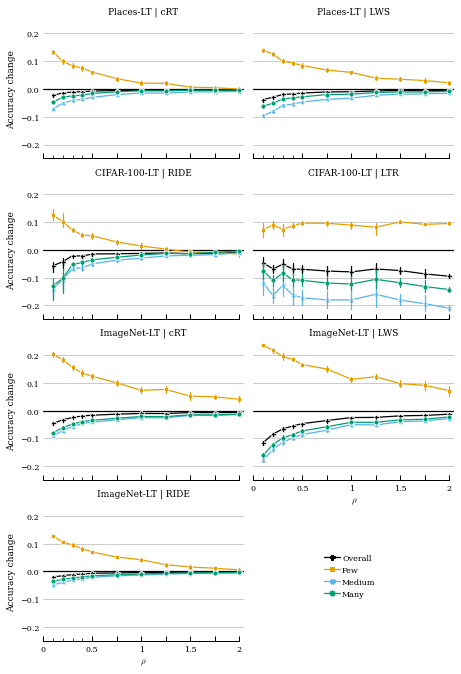

In [16]:
_ = plot("paper")

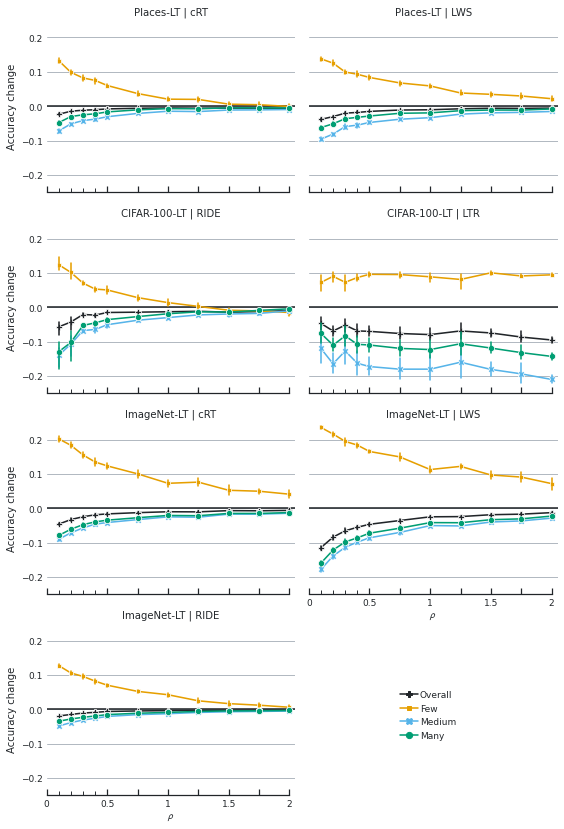

In [17]:
_ = plot("web_light")

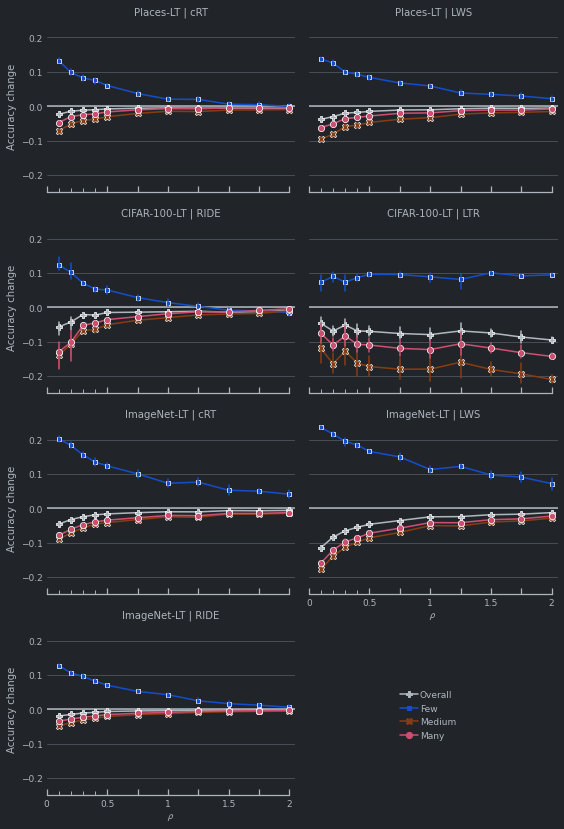

In [18]:
_ = plot("web_dark")